# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from wapi import api_key
import wapi

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = wapi.api_key
from wapi import api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data1 = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data1.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | upernavik
Processing Record 2 | tuatapere
Processing Record 3 | shitkino
Processing Record 4 | barentsburg
City barentsburg not found. Skipping to next city.
Processing Record 5 | puerto ayora
Processing Record 6 | qujing
Processing Record 7 | rikitea
Processing Record 8 | namatanai
Processing Record 9 | anadyr
Processing Record 10 | karratha
Processing Record 11 | ushuaia
Processing Record 12 | gizo
Processing Record 13 | lompoc
Processing Record 14 | hasaki
Processing Record 15 | qaanaaq
Processing Record 16 | constitucion
Processing Record 17 | east london
Processing Record 18 | hobart
Processing Record 19 | nizhneyansk
City nizhneyansk not found. Skipping to next city.
Processing Record 20 | stornoway
City stornoway not found. Skipping to next city.
Processing Record 21 | georgetown
Processing Record 22 | aljezur
Processing Record 23 | arraial do cabo
Processing Record 24 | half moon bay
Processing Re

Processing Record 210 | bandarbeyla
Processing Record 211 | athabasca
Processing Record 212 | victoria
Processing Record 213 | polyarnyye zori
Processing Record 214 | kimberley
Processing Record 215 | isla vista
Processing Record 216 | sydney
Processing Record 217 | cidreira
Processing Record 218 | baghmara
Processing Record 219 | nanortalik
Processing Record 220 | belushya guba
City belushya guba not found. Skipping to next city.
Processing Record 221 | oussouye
Processing Record 222 | tautira
Processing Record 223 | storforshei
Processing Record 224 | saint george
Processing Record 225 | nguiu
City nguiu not found. Skipping to next city.
Processing Record 226 | buluang
Processing Record 227 | griffith
Processing Record 228 | sonari
Processing Record 229 | zaraza
Processing Record 230 | port blair
Processing Record 231 | bubaque
Processing Record 232 | bodden town
Processing Record 233 | bay roberts
Processing Record 234 | barabai
Processing Record 235 | atambua
Processing Record 236 

Processing Record 422 | saint-joseph
Processing Record 423 | anzio
Processing Record 424 | yarmouth
Processing Record 425 | port macquarie
Processing Record 426 | dingle
Processing Record 427 | arman
Processing Record 428 | deputatskiy
Processing Record 429 | ambulu
Processing Record 430 | tawang
Processing Record 431 | belmonte
Processing Record 432 | sao joao da barra
Processing Record 433 | chany
Processing Record 434 | tarauaca
Processing Record 435 | vardo
Processing Record 436 | mae hong son
Processing Record 437 | ponta do sol
Processing Record 438 | adrar
Processing Record 439 | palm valley
Processing Record 440 | northam
Processing Record 441 | faanui
Processing Record 442 | bremervorde
Processing Record 443 | axim
Processing Record 444 | rolla
Processing Record 445 | rio grande
Processing Record 446 | verkh-usugli
Processing Record 447 | matipo
Processing Record 448 | havre-saint-pierre
Processing Record 449 | bambanglipuro
Processing Record 450 | cap malheureux
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data1)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv("../city_dataoutput.csv", index_label="City_ID",index=False, header=True)

# Show Record Count
city_data_pd.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Max Temp      542
Wind Speed    542
lng           542
dtype: int64

In [8]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,upernavik,98,GL,1563554539,91,72.79,44.23,13.58,-56.15
1,tuatapere,44,NZ,1563554539,97,-46.13,45.00,1.99,167.69
2,shitkino,33,RU,1563554539,85,56.37,55.21,7.00,98.35
3,puerto ayora,75,EC,1563554539,83,-0.74,71.60,14.99,-90.35
4,qujing,100,CN,1563554540,89,25.49,64.75,2.01,103.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

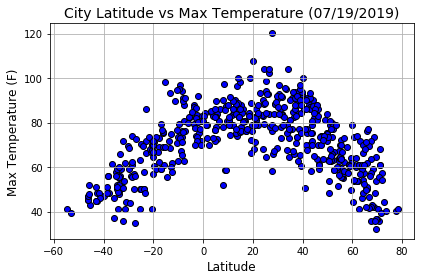

In [9]:

Lats_Temp = plt.scatter(lats, max_temps, marker="o", 
            facecolors="blue", edgecolors="black", alpha=1)

#Title + Labels
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Max Temperature (F)", fontsize = 12)
plt.title("City Latitude vs Max Temperature (07/19/2019)", fontsize = 14)

#Add Grid
plt.grid()
plt.tight_layout()
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

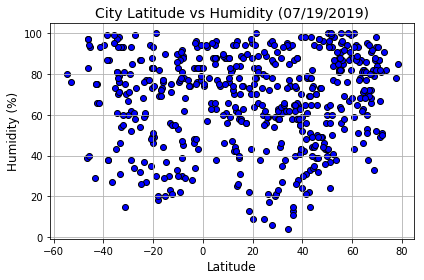

In [10]:

Lats_Humidity = plt.scatter(lats, humidity, marker="o", 
            facecolors="blue", edgecolors="black", alpha=1)

#Title + Labels
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)
plt.title("City Latitude vs Humidity (07/19/2019)", fontsize = 14)

#Add Grid
plt.grid()
plt.tight_layout()
plt.savefig("LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

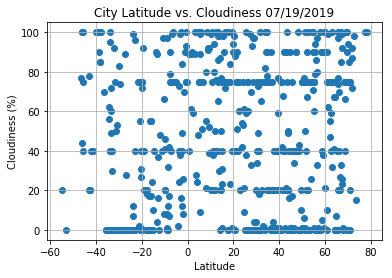

In [11]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("latvscloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

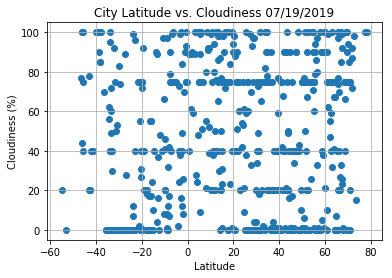

In [12]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("latvswindspeed.png")

# Show plot
plt.show()